# Multiple linear regression 

Multiple Linear Regression Using Python (without scikit learn library)

Group 4:
- 2502400853 - Gregorius Henry Wirawan 
- 2502400802 - Katriel Larissa Wiguna
- 2502401055 - Michael Tantowen

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
class LinearRegression:
    def __init__(self,X,Y): 
        ones=np.ones(X.shape)
        X=np.append(ones,X,axis=1)
        self.X=X
        self.Y=Y
        self.m=X.shape[0]
        self.n=X.shape[1]
        self.theta=np.random.randn(X.shape[1])
        
    def computeCostFunction(self):
        h=np.matmul(self.X,self.theta)
        self.J=(1/(2*self.m))*np.sum((h-self.Y)**2)
        return self.J
    
    def performGradientDescent(self,num_of_iter,alpha):
        self.Cost_history=[]
        self.theta_history=[]
        for x in range(num_of_iter):
            h=np.matmul(self.X,self.theta)
            J=self.computeCostFunction()
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp=h-self.Y
            self.theta=self.theta-(alpha/self.m)*(self.X.T.dot(temp))
        return self.theta,self.Cost_history,self.theta_history
            
        
    def predict(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        self.Y_pred=np.matmul(X_test,self.theta)
        self.error_percentage=(abs(self.Y_pred-Y_test)/Y_test)*100
        return self.Y_pred,self.error_percentage
    
    def predictUsingNormalEquation(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        inv=np.linalg.pinv(np.matmul(self.X.T,self.X))
        self.w=np.matmul(np.matmul(inv,self.X.T),self.Y)
        y_pred=np.matmul(X_test,self.w)
        return y_pred,(abs(Y_test-y_pred)/Y_test)*100
        
    def returnTheta(self):
        return self.theta
    
    def returnX(self):
        return self.X
        
    def returnY(self):
        return self.Y


In [29]:
class FeatureScaling:
    def __init__(self,X,y):
        self.X=X.copy()
        if y.ndim==1:
            y=np.reshape(y,(y.shape[0],1))
        self.y=y.copy()
        self.minMax_X={}
        self.minMax_y={}
    
    def fit_transform_X(self):
        num_of_features=self.X.shape[1]
        for i in range(num_of_features):
            feature=self.X[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_X[i]=np.array([Mean,Min,Max])
            self.X[:,i]=feature
        return self.X.copy()
    
    def fit_transform_Y(self):
        num_of_features=self.y.shape[1]
        for i in range(num_of_features):
            feature=self.y[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_y[i]=np.array([Mean,Min,Max])
            self.y[:,i]=feature
        return np.reshape(self.y,self.y.shape[0])
    
    def inverse_transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_X[i][1]
            Max=self.minMax_X[i][2]
            feature=feature*(Max-Min)+Mean
            X_transformed[:,i]=feature
        return X_transformed
    
    def inverse_transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=feature*(Max-Min)+Mean
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            X_transformed[:,i]=feature
        return X_transformed
    
    def transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def returnX(self):
        return self.X
    
    def returnY(self):
        return self.y
        
        

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from LinearRegression import LinearRegression

In [31]:
Data=pd.read_csv('Startups.csv')
print(Data)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [32]:
# Delete data yang memiliki value 0 
Data = Data[(Data != 0).all(axis=1)]

In [33]:
dummies = pd.get_dummies(Data['State'])
Data = Data.drop('State', axis=1)
Data = pd.concat([Data.iloc[:, :3], dummies.astype('float64'), Data.iloc[:, 3:]], axis=1)
print(Data)

    R&D Spend  Administration  Marketing Spend  California  Florida  New York  \
0   165349.20       136897.80        471784.10         0.0      0.0       1.0   
1   162597.70       151377.59        443898.53         1.0      0.0       0.0   
2   153441.51       101145.55        407934.54         0.0      1.0       0.0   
3   144372.41       118671.85        383199.62         0.0      0.0       1.0   
4   142107.34        91391.77        366168.42         0.0      1.0       0.0   
5   131876.90        99814.71        362861.36         0.0      0.0       1.0   
6   134615.46       147198.87        127716.82         1.0      0.0       0.0   
7   130298.13       145530.06        323876.68         0.0      1.0       0.0   
8   120542.52       148718.95        311613.29         0.0      0.0       1.0   
9   123334.88       108679.17        304981.62         1.0      0.0       0.0   
10  101913.08       110594.11        229160.95         0.0      1.0       0.0   
11  100671.96        91790.6

In [34]:
Data.describe()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,Profit
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,78241.718043,121947.043478,228393.083261,0.326087,0.347826,0.326087,117063.925217
std,43695.348335,26812.767940,111336.691801,0.473960,0.481543,0.473960,35960.003971
min,1000.230000,51283.140000,1903.930000,0.000000,0.000000,0.000000,49490.750000
25%,46117.032500,103730.875000,142431.385000,0.000000,0.000000,0.000000,96537.832500
50%,74661.715000,122699.795000,239452.750000,0.000000,0.000000,0.000000,108643.015000
75%,111370.977500,144842.180000,302423.767500,1.000000,1.000000,1.000000,143590.930000
max,165349.200000,182645.560000,471784.100000,1.000000,1.000000,1.000000,192261.830000


In [35]:
#training and testing size
train_size=int(0.7*Data.shape[0])
test_size=int(0.3*Data.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 32
Testing set size : 13


In [36]:
#shuffle the dataset
Data=Data.sample(frac=1)
X=Data.iloc[:,0:6].values
y=Data.iloc[:,6].values

In [37]:
from FeatureScaling import FeatureScaling
fs=FeatureScaling(X,y)
X=fs.fit_transform_X()
y=fs.fit_transform_Y()

In [38]:
#training set split
X_train=X[0:train_size,:]
Y_train=y[0:train_size]

In [39]:
print(X_train.shape)
print(Y_train.shape)

(32, 6)
(32,)


In [40]:
#testing set split
X_test=X[train_size:,:]
Y_test=y[train_size:]

In [41]:
print(X_test.shape)
print(Y_test.shape)

(14, 6)
(14,)


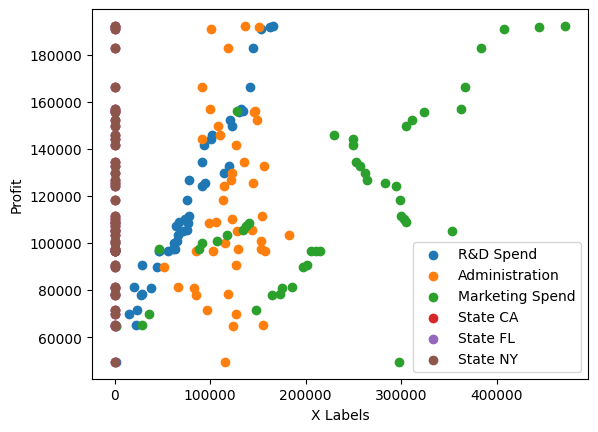

In [42]:
#scatter plot 
plt.scatter(Data['R&D Spend'], Data['Profit'], label='R&D Spend')
plt.scatter(Data['Administration'], Data['Profit'], label='Administration')
plt.scatter(Data['Marketing Spend'], Data['Profit'], label='Marketing Spend')
plt.scatter(Data['California'], Data['Profit'], label = 'State CA')
plt.scatter(Data['Florida'], Data['Profit'], label='State FL')
plt.scatter(Data['New York'], Data['Profit'], label='State NY')

#Adding labels and legends
plt.xlabel('X Labels')
plt.ylabel('Profit')
plt.legend()

#Display the plot
plt.show()

In [43]:
lr=LinearRegression(X_train,Y_train)

In [44]:
theta=lr.returnTheta()
print(theta)

[ 0.24388744 -0.22078586 -0.27150492  0.6855388   0.70298114 -0.36023333
 -0.0637584  -0.41041768  0.3591582   0.16407031 -0.47718837 -0.06398001]


In [45]:
#testing set prediction
y_pred_normal,error_percentage=lr.predictUsingNormalEquation(X_test,Y_test)
y_pred_normal=fs.inverse_transform_Y(y_pred_normal)
print(error_percentage)

[106.54168536  -0.51561991 -54.01571881 -55.18926117  -0.94799589
  65.61073768 -12.49736204  -6.40471819 143.41669873 -26.82998743
 -22.66386713  15.50802996 -60.10929295  11.7619766 ]


In [46]:
#training set prediction
y_pred_train_normal,error_percentage_train_normal=lr.predictUsingNormalEquation(X_train,Y_train)
y_pred_train_normal=fs.inverse_transform_Y(y_pred_train_normal)
print(lr.computeCostFunction())

0.33847599637928405


In [47]:
#learning parameters
n_iter=1000
alpha=0.05

theta,J_Array,theta_array=lr.performGradientDescent(n_iter,alpha)

In [48]:
y_pred_grad,ErrorPercentage=lr.predict(X_test,Y_test)
print(ErrorPercentage)
y_pred_grad=fs.inverse_transform_Y(y_pred_grad)

[  39.09321197   -4.94550441 -222.19165107   -8.81663522   -0.48010911
   66.7495239   -11.60077365  -17.37404801  106.88114641  -25.0445597
  -40.3159298     1.2512557   -34.73562886    0.99915443]


In [49]:
#let's see how train set is predicted
y_pred_train,error_for_train=lr.predict(X_train,Y_train)
y_pred_train=fs.inverse_transform_Y(y_pred_train)
print(error_for_train)

[   2.12724445   -8.62348056   -8.26870613   29.44135662  -28.13135043
  -27.63846163  -73.67730312 -165.51839112   15.88855286    1.31675321
  463.99522009   15.99935848   18.48436425   -7.03351236  -14.19387814
  -34.48949922   67.12857624  -37.2690331    15.46391377   20.79254367
   56.11241254 -123.47780159   61.82737024  -17.8360707     1.0172539
   24.5600268    90.02375465  -43.23662318  -16.24106835  -11.16065736
  -15.50407894   -1.2349843 ]


In [50]:
#inverse scaling the features
X_train=fs.inverse_transform_X(X_train)
Y_train=fs.inverse_transform_Y(Y_train)
X_test=fs.inverse_transform_X(X_test)
Y_test=fs.inverse_transform_Y(Y_test)

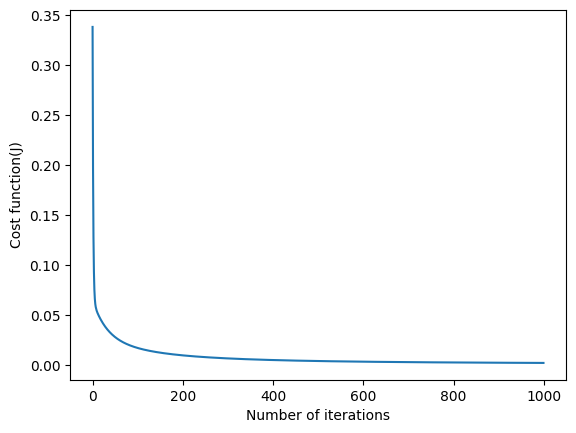

In [51]:
#plot of how cost function is minimized as number of iterations is proceeded
x=[i for i in range(1000)]
plt.plot(x,J_Array)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function(J)')
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred_grad)
r2 = r2_score(Y_test, y_pred_grad)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 46168286.212346606
R-squared: 0.9585518041772564
